Assignment 1
--------------------
Finding tokens,types and TTR.

In [41]:
from nltk.tokenize import word_tokenize
from collections import Counter

f=open('tomsawyer.txt','r')
r=f.read()
r =r.lower()

tokenizelist=word_tokenize(r)

tokens=Counter(tokenizelist)
remove=[',','.',"''",'``','--','!','?',';',"'s"]
for i in remove:
	del tokens[i]
m=0
for i in tokens:
	m+=tokens[i]
        
print("Number of types:",len(tokens))
print("Number of tokens:",m)
print("TTR :",float(len(tokens))/m)


Number of types: 7916
Number of tokens: 75376
TTR : 0.10502016556994269


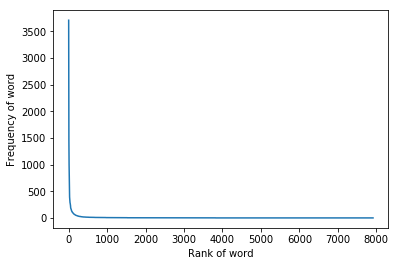

In [42]:
import matplotlib.pyplot as plt

sorted_tokens=sorted(tokens,key=tokens.get)[::-1]
#print(sorted_tokens)
frequency=sorted(tokens.values())[::-1]
rank=[i for i in range(1,len(tokens)+1)]

plt.plot(rank,frequency)
plt.xlabel('Rank of word')
plt.ylabel('Frequency of word')

plt.show()

Zipf's Law: plotting length vs frequency of the word. The length of th word is inversely proportional to its frequency.
Note: All words with same length are counted towards one type.

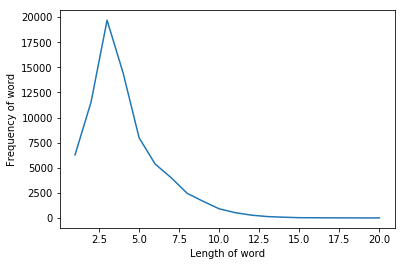

In [16]:
wordlen={} #dictionary with key=length and value=frequency for that length
for i in tokens:
    l=len(i)
    wordlen[l]=wordlen.get(l,0)+tokens[i]
    
length=sorted(wordlen)
frequency=[wordlen[i] for i in length]
#frequencyinv=[1/wordlen[i] for i in length]
#print(wordlen,length,frequency)

plt.plot(length,frequency)
plt.ylabel('Frequency of word')
plt.xlabel('Length of word')
plt.show()



The Zipf's law works here for larger lengths, i.e when length of words is greater than 3.

Zipf's law for meaning vs frequency: The number of meanings of a word is proportional to the sqrt of its frequency.

In [53]:
import random
l=[] #list of 20 words
l2=[] #list of 1/sqrt(rank) of the words
for i in range(10):
    k=random.randint(1,len(rank)+1)
    l.append(sorted_tokens[k])
    l2.append(1.0/(k)**(1/2.0))
#print(l)
#print(l2)


    

[1.0, 1.0, 1.0, 1.0, 1.4142135623730951, 1.0, 1.0, 2.8284271247461903, 1.7320508075688772, 1.0]


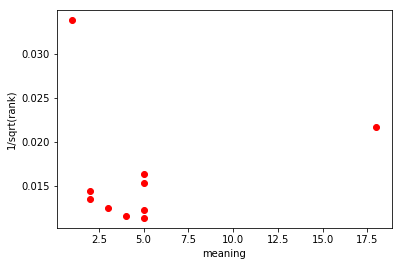

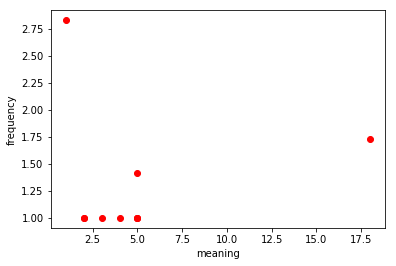

In [55]:
l=['vivacity', 'raising', 'baking', 'weighty', 'tugged', 'shoving', 'north', 'desk', 'stuff', 'energies']
l2=[0.013437656161169417, 0.012235219605809911, 0.014453342234025408, 0.01251663470930526, 0.01632775472970681, 
    0.01133877220897369, 0.01528009177861889, 0.033806170189140665, 0.02171861213815347, 0.011592693341327589]
meaning=[2,5,2,3,5,5,5,1,18,4]
freq=[]
for i in l:
    freq.append((tokens[i])**(1/2.0))
print(freq)

    
plt.plot(meaning,l2,'ro')
plt.xlabel('meaning')
plt.ylabel('1/sqrt(rank)')
plt.show()

plt.plot(meaning,freq,'ro')
plt.xlabel('meaning')
plt.ylabel('frequency')
plt.show()

Heaps Law: Relation between size of vocabulary(V) and number of occurances of words(N)

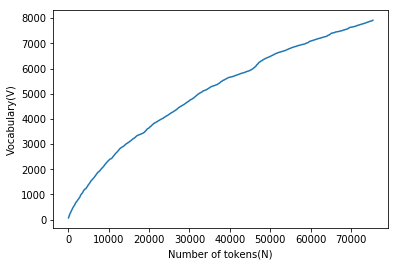

In [31]:
typ=[]
tok=[]
p=0
while(p<=len(tokenizelist)):
    p+=100
    k=0
    
    tokenizelist2=tokenizelist[0:p]  #counting types and tokens for 100, 200, 300 words and so on.
    tokens2=Counter(tokenizelist2)
    
    for i in remove:
        del tokens2[i]
    for i in tokens2:
        k+=tokens2[i]
    typ.append(len(tokens2))
    tok.append(k)

plt.plot(tok,typ)
plt.ylabel('Vocabulary(V)')
plt.xlabel('Number of tokens(N)')
plt.show()

Calculating Beta and k in V=k(N)^Beta

In [25]:
#source: https://lmfit.github.io/lmfit-py/model.html
from scipy.optimize import curve_fit
def heapslaw(x,k,beta):
    return k*(x**beta)
init=[60,0.5]
final, covar = curve_fit(heapslaw, tok,typ, p0=init)
#print(final)
print("k:",final[0])
print("Beta:",final[1])

k: 9.611176216942775
Beta: 0.6000135513806312


Fitted curve for new values of beta and k.

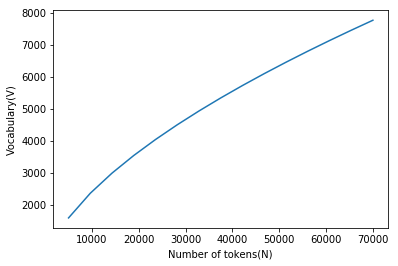

In [32]:
import numpy

typf=numpy.linspace(5000,70000,15) #new types
tokf=[heapslaw(i,final[0],final[1]) for i in typf] #new tokens
plt.plot(typf,tokf)
plt.ylabel('Vocabulary(V)')
plt.xlabel('Number of tokens(N)')
plt.show()
